<b><i>Memanggil Library Numpy dan Pandas di Python</i></b>

In [2]:
import numpy as np
import pandas as pd

<b><i>Membaca file dari Excel atau CSV sebagai data frame</i></b>

In [3]:
# Membaca file CSV
# [nama variabel] = pd.read_csv("nama_file.csv")

# Membaca file Excel
# [nama variabel] = pd.read_csv("nama_file.xlsx")

# Contoh
order_df = pd.read_csv("order.csv")

<b><i>Melihat Struktur Kolom dan Baris dari Data Frame</i></b>

In [3]:
# Menggunakan .shape
print(order_df.shape)

(49999, 12)


<b><i>Melihat Preview Data dari Data Frame</i></b>

In [4]:
# Menggunakan head dan limit 10
print(order_df.head(10))

                           order_id  quantity  \
0  2e7a8482f6fb09756ca50c10d7bfc047         2   
1  2e7a8482f6fb09756ca50c10d7bfc047         1   
2  e5fa5a7210941f7d56d0208e4e071d35         1   
3  3b697a20d9e427646d92567910af6d57         1   
4  71303d7e93b399f5bcd537d124c0bcfa         1   
5  be5bc2f0da14d8071e2d45451ad119d9         1   
6  0a0837a5eee9e7a9ce2b1fa831944d27         1   
7  1ff217aa612f6cd7c4255c9bfe931c8b         1   
8  22613579f7d11cc59c4347526fc3c79e         1   
9  356b492aba2d1a7da886e54e0b6212b7         1   

                         product_id    price  \
0  f293394c72c9b5fafd7023301fc21fc2  1489000   
1  c1488892604e4ba5cff5b4eb4d595400  1756000   
2  f3c2d01a84c947b078e32bbef0718962  1707000   
3  3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4  d2998d7ced12f83f9b832f33cf6507b6  3833000   
5  fd7fd78fd3cbc1b0a6370a7909c0a629  1480000   
6  583916a5dae918f5e89baec139141c54  4489000   
7  33430c5c1027d812b5c62f778e5ee7f7   822000   
8  3ff81cd0e0861e991bb0106c0

<b><i>Statistik Deskriptif dari Data Frame - Part 1</i></b>

In [5]:
print(order_df.describe(include="all"))

                                order_id      quantity  \
count                              49999  49999.000000   
unique                             42694           NaN   
top     8272b63d03f5f79c56e9e4120aec44ef           NaN   
freq                                  21           NaN   
mean                                 NaN      1.197484   
std                                  NaN      0.722262   
min                                  NaN      1.000000   
25%                                  NaN      1.000000   
50%                                  NaN      1.000000   
75%                                  NaN      1.000000   
max                                  NaN     21.000000   

                              product_id         price  \
count                              49999  4.999900e+04   
unique                             16866           NaN   
top     99a4788cb24856965c36a24e339b6058           NaN   
freq                                 366           NaN   
mean         

<b><i>Statistik Deskriptif dari Data Frame - Part 2</i></b>

In [6]:
print(order_df.describe(include=["object"]))

                                order_id                        product_id  \
count                              49999                             49999   
unique                             42694                             16866   
top     8272b63d03f5f79c56e9e4120aec44ef  99a4788cb24856965c36a24e339b6058   
freq                                  21                               366   

                               seller_id                       customer_id  \
count                              49999                             49999   
unique                              1777                             42694   
top     4a3ca9315b744ce9f8e9374361493884  fc3d1daec319d62d49bfb5e1f83123e9   
freq                                1236                                21   

       order_status purchase_date     payment_type product_category_name  
count         49999         49999            49999                 49999  
unique            7           356                4                  

<b><i>Statistik Deskriptif dari Data Frame - Part 3</i></b>

In [7]:
print(order_df.loc[:, "quantity"].mean())
print(order_df.loc[:, "product_weight_gram"].median())

1.1974839496789935
800.0


<b><i>Tugas Praktek Chapter 2</i></b>

In [8]:
# Quick summary dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000


In [9]:
# Median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, "price"].median())

2610000.0


<b><i>Tugas Praktek Chapter 3</i></b>

<b><i>Menggunakan Library Matplotlib</i></b>

In [10]:
import matplotlib.pyplot as plt

AttributeError: 'Rectangle' object has no property 'xlabelsize'

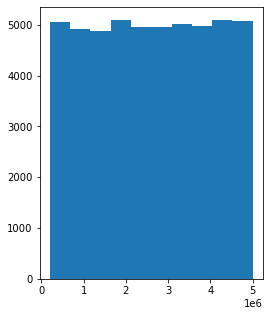

In [7]:
# Untuk menampilkan histogram plot
order_df[["price"]].plot.hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

<b><i>Standar Deviasi dan Varians</i></b>

In [12]:
print(order_df.loc[:, "product_weight_gram"].std())
print(order_df.loc[:, "product_weight_gram"].var())

3929.896875372737
15444089.451064402


In [14]:
# Tanpa menggunakan print juga bisa
order_df.loc[:, "product_weight_gram"].std()

3929.896875372737

<b><i>Menemukan Outlier Menggunakan Pandas</i></b>

In [23]:
# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3 - Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [20]:
print((order_df < (Q1 - 1.5*IQR)) | (order_df > (Q3 + 1.5*IQR)))

       customer_id  freight_value  order_id  order_status  payment_type  \
0            False          False     False         False         False   
1            False          False     False         False         False   
2            False          False     False         False         False   
3            False          False     False         False         False   
4            False          False     False         False         False   
...            ...            ...       ...           ...           ...   
49994        False          False     False         False         False   
49995        False          False     False         False         False   
49996        False          False     False         False         False   
49997        False          False     False         False         False   
49998        False          False     False         False         False   

       price  product_category_name  product_id  product_weight_gram  \
0      False               

 <b><i>Rename Kolom Data Frame</i></b>

In [24]:
# Ganti nama kolom freight_value menjadi shipping_cost
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

<b><i>.groupby menggunakan Pandas</i></b>

In [3]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [26]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=False)
print(sort_harga)

                               order_id  quantity  \
37085  d7b2d3b902441cf3dd12cd125533217d         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
3976   f343624eab419250ad81f1ce6be22c93         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
...                                 ...       ...   
33786  0d9e86e02c1a823b20c03ea29d616607         1   
42166  54220fcc516cabe9ec84b210c0765ef2         1   
31745  59a19c83ff825948739dd1601cc107b6         1   
42452  9960ee97c2f8d801a200a01893b3942f         1   
11939  64619901c45fba79638d666058bf6be6         1   

                             product_id    price  \
37085  35afc973633aaeb6b877ff57b2793310  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
3976   777d2e438a1b645f3aec9bd57e92672c  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
...                                 ...      ...   